<a href="https://colab.research.google.com/github/Dashnyam7/DIC_assignment/blob/main/Fuji_Shimoyama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np

csv_path = "mtfuji_data.csv" # Specify the file name (path)

np.set_printoptions(suppress=True) # Set prohibition of scientific notation
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

In [37]:
print(fuji[130:140])

[[  130.          35.352505   138.756638  2563.4      41888.      ]
 [  131.          35.35418    138.753742  2703.1      42210.      ]
 [  132.          35.355855   138.750846  2825.55     42532.      ]
 [  133.          35.35753    138.74795   2967.9      42854.      ]
 [  134.          35.359205   138.745054  3087.81     43177.      ]
 [  135.          35.36088    138.742157  3266.24     43499.      ]
 [  136.          35.362555   138.739261  3434.59     43821.      ]
 [  137.          35.36423    138.736364  3600.08     44143.      ]
 [  138.          35.365904   138.733468  3679.96     44466.      ]
 [  139.          35.367579   138.730571  3664.9      44788.      ]]


In [38]:
print(fuji)

[[    0.          35.134141   139.132082     0.           0.      ]
 [    1.          35.135826   139.129202     0.         322.      ]
 [    2.          35.13751    139.126322     0.         644.      ]
 ...
 [  297.          35.631284   138.271368  1973.99     95698.      ]
 [  298.          35.632947   138.268452  1841.36     96020.      ]
 [  299.          35.63461    138.265536  1725.8      96343.      ]]


In [39]:
print(fuji[:,3])

[   0.      0.      0.      0.      0.      0.      6.62    7.21   12.2
   54.41  171.56  177.84  228.21  275.38  433.76  371.74  380.06  503.4
  485.39  477.82  580.5   610.92  654.96  628.22  626.64  572.55  723.95
  701.94  879.47  976.17  919.16  817.    743.06  770.92  864.06  826.52
  748.39  756.11  724.5   724.5   724.5   724.5   724.5   724.5   724.5
  724.5   724.5   724.5   852.18  851.36  831.    880.44  955.14  849.52
  831.6   790.01  738.97  848.83  738.3   736.48  672.24  564.02  552.23
  497.41  558.28  503.02  462.33  469.66  429.49  454.21  412.27  362.29
  355.68  368.91  371.04  371.19  377.62  386.64  390.14  418.41  420.6
  443.    458.66  471.82  488.4   505.1   519.54  536.54  553.64  575.07
  588.99  602.36  613.04  631.71  660.43  672.36  700.15  725.72  741.17
  753.68  772.58  795.25  817.62  858.62  883.89  910.5   932.74  973.32
 1000.24 1034.34 1059.69 1105.8  1166.58 1219.86 1239.97 1292.52 1360.1
 1429.75 1506.66 1561.94 1598.36 1659.43 1726.5  1781.98

# [Problem 1] Data visualization

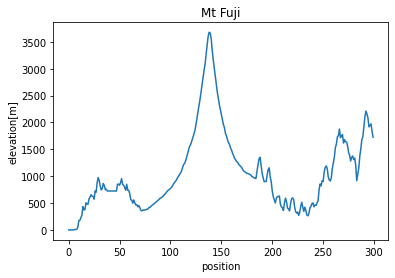

In [40]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
position = fuji[:,0]
elevation = fuji[:,3]
ax.plot(position, elevation )
ax.set_title('Mt Fuji')
ax.set_xlabel('position')
ax.set_ylabel('elevation[m]')
plt.show()

# [Problem 2] Create a function to calculate the gradient at a certain point

In [41]:
def compute_gradient(elevation, i):
  gradient = (elevation[i]-elevation[i-1])
  return gradient

compute_gradient(elevation, 136)

168.35000000000036

In [66]:
gradient = compute_gradient(elevation,75)
gradient

0.14999999999997726

# [Problem 3] Create a function to calculate the destination point

In [43]:
def cal_dest_point(elevation, j, alpha=0.2):
  dest_point = j - alpha*compute_gradient(elevation, j)
  return int(round(dest_point,0))

In [67]:
a = cal_dest_point(elevation, 75)
a

75

# [Question 4] Create a function to go down a mountain

In [71]:
def down_point(elevation, j=136, alpha=0.2):
  x = j
  grad=compute_gradient(elevation, x)
  i = 0
  while grad > 0:
    i=i+1
    a = x
    x = cal_dest_point(elevation, x)
    grad=compute_gradient(elevation, x)
    if i>j:
      break
  return a

In [72]:
down_point(elevation, 138)

73

# [Problem 5] Visualization of the descent process

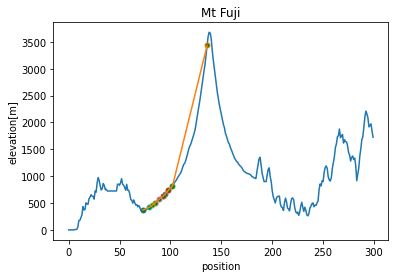

In [78]:
def vis_point(elevation, j=136, alpha=0.2):
  fig, ax = plt.subplots()
  ax.plot(position, elevation )
  ax.set_title('Mt Fuji')
  ax.set_xlabel('position')
  ax.set_ylabel('elevation[m]')
  x = j
  aa = [x]
  bb = [elevation[x]]
  grad=compute_gradient(elevation, x)
  while grad > 0:
    a = x
    x = cal_dest_point(elevation, x)
    grad=compute_gradient(elevation, x)
    ax.plot(a,elevation[a],marker="o", markersize=5, markerfacecolor="green")
    aa = np.append(aa,a)
    bb = np.append(bb,elevation[a])
  ax.plot(aa,bb)
  plt.show()


vis_point(elevation)

# [Problem 6] Changing initial values
# [Problem 7] Visualization of the descent process for each initial value

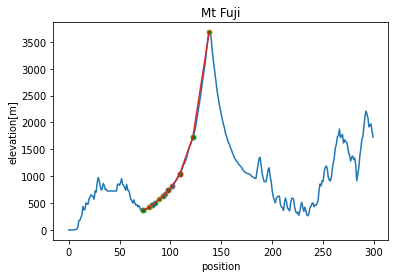

In [84]:
vis_point(elevation, 138)